 # Práctica Guiada 2.
 ----
  
  Universidad : UTEC \\
  Curso       : Inteligencia Artificial \\
  Profesor    : Cristian López Del Alamo \\
  Tema        : Regresión Lineal Múltiple \\
  

 ----




1.  En esta práctica se pide realizar pruebas utilizando  para analizar el comportamiento de la regularizacion, tanto $L_1$ como $L_2$
2.  Se le proporcionrá una bases de datos generada mediante una función seno, la cual deberá utilizar para generar una aproximación mediante regresión no lineal.

3. MSE Loss Function \\

 a. $MSE + L_2 = \frac{1}{2m}\sum_{i=0}^m (y_i - h(x_i))^2 + \lambda\sum_{i=1}^p (w_i)^2$

 b. $MSE + L_1 = \frac{1}{2m}\sum_{i=0}^m (y_i - h(x_i))^2 + \lambda\sum_{i=1}^p |w_i|$

4. Utilize todo los datos del dataset para entrenar  el modelo, analizar las funciones de pérdida con los distintos métodos de regularizción, grafique los resultados y muestre un video donde se pueda ver el ajuste de la función.

Importante: No se olvide de normalizar los datos entre cero y uno, por cada columna.





In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

from sklearn.preprocessing import MinMaxScaler

Crear el DataSet







    x_train   y_train
0       0.0 -0.358603
1       0.1  0.213012
2       0.2  0.424980
3       0.3  0.381792
4       0.4  0.322533
..      ...       ...
58      5.8 -0.746805
59      5.9 -0.285021
60      6.0 -0.676215
61      6.1 -0.297002
62      6.2  0.020623

[63 rows x 2 columns]


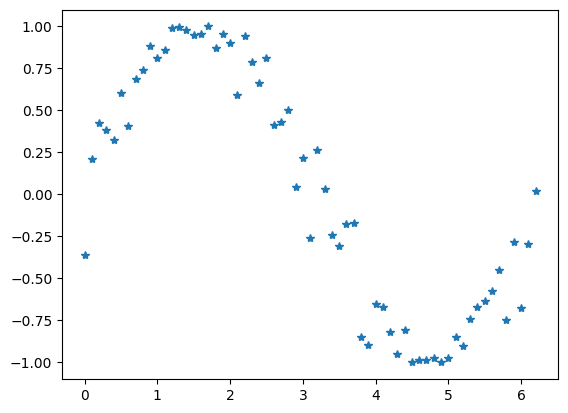

In [88]:
# create training  dataset.
x_vals = np.arange(0,2*np.pi,0.1)
y_vals =  [ np.sin(e + np.random.normal(0,0.2) ) for e  in x_vals]
data = pd.DataFrame({"x_train":x_vals, "y_train":y_vals})
print(data)
plt.plot(x_vals, y_vals,'*',)
Y = y_vals

In [89]:
X = data["x_train"]
Y = data["y_train"]


# Modelo

Nota: Antes añadir Añadir una columna de nx1 a X con valor 1.

$h(X) = X*W^t$



In [90]:
def h(X, W):
      # write your code here
    # your code returns a  n by 1 vector. This  vector contains the prediction for all data
    return np.multiply(X,W)

# Loss function
Nota: La función de pérdida no cambia, solo la llamada a la función h

$\mathcal{L} =  \frac{||Y - XW^t||^2_2}{2n} + \lambda||W||^2_2$



In [91]:
def Error(X, W, Y,lam):
    # write your code here
    # your code returns the error value
    return ((np.linalg.norm((Y-h(X,W)), ord=2)**2) / (2 * len(Y))) + lam*(np.linalg.norm(W, ord=2))**2

# Cálculo de derivadas
Nota: Intente resolver este algoritmo desde un punto de vista matricial.

$dw_j = \frac{\sum_{i=0}^m(y_i - h(x_i))(-x_{i}^j)}{n} + 2\lambda w_j$

In [92]:
def derivada(X, W, Y, lam):
    # write your code here
    # Return a (k+1)x1 vector. This vector contains the derivatives from Loss function
    # respect to all variable w_j

    return (np.dot(np.transpose(X), (Y - h(X,W))) / len(Y)) + 2*lam*W

# Actualiación de parámetros

Recuerde: $\frac{\partial L}{\partial w}$ representa un vector con todas las derivadas de la función de pérdida con rescto a W.

$W  = W - \alpha*\frac{\partial L}{\partial W} $



In [93]:
def update(W,  dW, alpha):
  # write your code here

  return W + alpha*dW

# Training

In [5]:
def train(X, Y, epochs, alfa,lam):
    np.random.seed(2001)
    W = np.array([np.random.rand() for i in range(X.shape[0])])

    L = Error(X,W,Y,lam)
    loss = []
    for i in range(epochs):
        dW = derivada(X, W, Y,lam)
        W = update(W, dW, alfa)
        L = Error(X, W,Y,lam)
        loss.append(L)
        if i%10000==0:
            print(L)

    return W, loss

AttributeError: 'list' object has no attribute 'shape'

1.8263447123542855


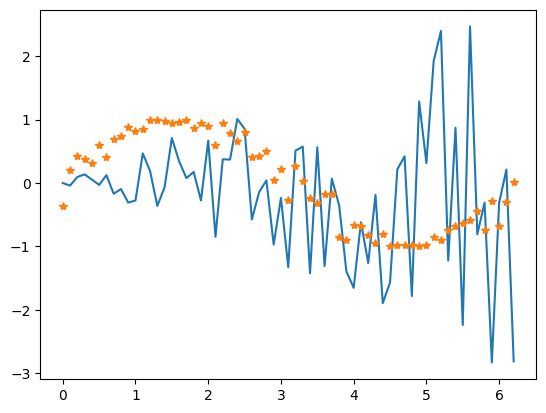

In [107]:
#Plotear la ecuación
import numpy as np
from matplotlib import pyplot as plt

W, loss = train(X,Y,1000,0.01,0.0001)

plt.plot(x_vals,h(X,W))

#plot the real data
plt.plot(x_vals, y_vals,'*',)

Carry out the following experiments:

1. Run the model with $n={100,1000,10000,100000}$ data points.
2. For each experiment, use $70\%$  for training the model,  $20\%$ for validation, and $10\%$ for testing.
3. Calculate the testing, validation, and training error for each experiment. Report a table with the results.
4. Vary the regularization parameter $\lambda$ in the following manner:
 $\lambda = {0.001, 0.01,0.1,1,10,100}$.
5. Analyze what happens with each regularization method, $L_2$, $L_1$;  when $\lambda$ is a large value and when it is a small value. Additionally, print the value of the weights at the end of each experiment and indicate in which cases the vector W is more sparse or has values closer to 0. When do you use. is more sparse or has values closer to 0.
6. Report a table with the results and a graph.
7.  Vary the degree of the polynomial in the following manner $g = {2,3,4,5,...20}$ and run the model first without regularization and then with $L_1$ y
  regularization and with $L_2$.  For each experiment, compute the training, validation, and testing error. Report a table with the results and conclude what happens when $g$ is very large, what happens when it is small, and what is the optimal $g$ according to your results.

Note: For the test data, only report the final average error in each experiment.


